<a href="https://colab.research.google.com/github/Anishkha-02/OIBSIP/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving apps.csv to apps (1).csv
Saving user_reviews.csv to user_reviews (1).csv
Saving Twitter_Data.csv to Twitter_Data (1).csv


In [8]:
# Load the Twitter sentiment dataset
twitter_data = pd.read_csv("Twitter_Data.csv")

# Load the Play Store sentiment dataset
apps_data = pd.read_csv("apps.csv")
user_reviews_data = pd.read_csv("user_reviews.csv")

In [9]:
# Preview the datasets
print("Twitter Sentiment Dataset:")
print(twitter_data.head(5),)
print("\nPlay Store User Reviews Dataset:")
print(user_reviews_data.head(5))

Twitter Sentiment Dataset:
                                          clean_text  category
0  when modi promised “minimum government maximum...      -1.0
1  talk all the nonsense and continue all the dra...       0.0
2  what did just say vote for modi  welcome bjp t...       1.0
3  asking his supporters prefix chowkidar their n...       1.0
4  answer who among these the most powerful world...       1.0

Play Store User Reviews Dataset:
                     App                                  Translated_Review  \
0  10 Best Foods for You  I like eat delicious food. That's I'm cooking ...   
1  10 Best Foods for You    This help eating healthy exercise regular basis   
2  10 Best Foods for You                                                NaN   
3  10 Best Foods for You         Works great especially going grocery store   
4  10 Best Foods for You                                       Best idea us   

  Sentiment  Sentiment_Polarity  Sentiment_Subjectivity  
0  Positive                1

In [10]:
# For Twitter dataset
twitter_data = twitter_data[['clean_text', 'category']]

# For Play Store user reviews dataset
user_reviews_data = user_reviews_data[['Translated_Review', 'Sentiment']]

# Rename columns for consistency
user_reviews_data.columns = ['clean_text', 'category']

In [11]:
# Concatenate the datasets
combined_data = pd.concat([twitter_data, user_reviews_data], ignore_index=True)

# Remove rows with missing values
combined_data.dropna(inplace=True)

In [12]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [13]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Define function for text cleaning
def clean_text(text):
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
    # Join tokens back into text
    clean_text = ' '.join(lemmatized_tokens)
    return clean_text

# Apply text cleaning function to the 'clean_text' column
combined_data['clean_text'] = combined_data['clean_text'].apply(clean_text)

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the text data
X = tfidf_vectorizer.fit_transform(combined_data['clean_text'])

# Target variable
y = combined_data['category']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
# Map sentiment labels to numerical values
label_map = {'Negative': -1.0, 'Neutral': 0.0, 'Positive': 1.0}

# Apply mapping to y_train and y_test
y_train_mapped = y_train.map(label_map)
y_test_mapped = y_test.map(label_map)

In [21]:
# Find indices of missing values in y_train_mapped
missing_indices = y_train_mapped[y_train_mapped.isnull()].index

# Filter out corresponding rows from X_train and y_train_mapped
X_train_cleaned = X_train[y_train_mapped.notnull()]
y_train_mapped_cleaned = y_train_mapped[y_train_mapped.notnull()]

# Train the model with cleaned data
svm_model.fit(X_train_cleaned, y_train_mapped_cleaned)

SVC(kernel='linear')

In [23]:
# Drop NaN values from y_test_mapped
y_test_mapped_cleaned = y_test_mapped.dropna()

# Drop corresponding rows from y_pred_mapped
y_pred_mapped_cleaned = y_pred_mapped[y_test_mapped.notnull()]

# Evaluate the model with cleaned data
accuracy = accuracy_score(y_test_mapped_cleaned, y_pred_mapped_cleaned)
print("Accuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test_mapped_cleaned, y_pred_mapped_cleaned))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_mapped_cleaned, y_pred_mapped_cleaned))

Accuracy: 0.9168875927889714

Classification Report:
              precision    recall  f1-score   support

        -1.0       0.89      0.84      0.86      1675
         0.0       0.86      0.89      0.87      1029
         1.0       0.94      0.95      0.94      4840

    accuracy                           0.92      7544
   macro avg       0.89      0.89      0.89      7544
weighted avg       0.92      0.92      0.92      7544


Confusion Matrix:
[[1401   50  224]
 [  37  919   73]
 [ 139  104 4597]]


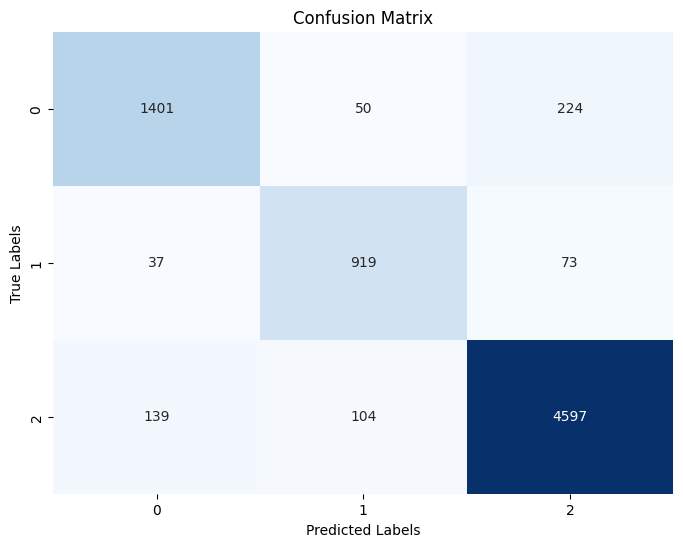

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix
plt.figure(figsize=(8, 6))
conf_matrix = confusion_matrix(y_test_mapped_cleaned, y_pred_mapped_cleaned)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()